### Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Pegando os arquivos

In [2]:
df_train = pd.read_csv('train.csv', sep="," , encoding="UTF8" )
df_test = pd.read_csv('test.csv', sep="," , encoding="UTF8" )


### Análise dos dados

In [3]:
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [4]:
#Separando as colunas que vou usar 

C_test = [
    'NU_INSCRICAO',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

C_train = [
    'NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

C_testR = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

In [5]:
df_train[C_train].head(5)

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,399.4,436.3,495.4,581.2,520.0,120.0,120.0,120.0,80.0,80.0
1,459.8,474.5,544.1,599.0,580.0,140.0,120.0,120.0,120.0,80.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_test[C_test].head(5)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,464.8,443.5,431.8,420.0,120.0,80.0,80.0,100.0,40.0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,391.1,491.1,548.0,580.0,120.0,120.0,120.0,120.0,100.0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,595.9,622.7,613.6,320.0,80.0,40.0,40.0,80.0,80.0
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,715494628a50142ce8cb17191cfe6d0f3cae0934,592.9,492.6,571.4,320.0,100.0,80.0,60.0,80.0,0.0


#### Retirada dos valores nulos 

In [7]:
df_train[C_train].isnull().sum()

NU_NOTA_MT         3597
NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
dtype: int64

In [8]:
df_test[C_test].isnull().sum()

NU_INSCRICAO          0
NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
NU_NOTA_REDACAO    1199
NU_NOTA_COMP1      1199
NU_NOTA_COMP2      1199
NU_NOTA_COMP3      1199
NU_NOTA_COMP4      1199
NU_NOTA_COMP5      1199
dtype: int64

In [9]:
df_test = df_test[C_test].dropna()
df_train = df_train[C_train].dropna()

In [10]:
df_train[C_train].isnull().sum()

NU_NOTA_MT         0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64

In [11]:
df_test[C_test].isnull().sum()

NU_INSCRICAO       0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64

In [12]:
df_test.head(5)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,464.8,443.5,431.8,420.0,120.0,80.0,80.0,100.0,40.0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,391.1,491.1,548.0,580.0,120.0,120.0,120.0,120.0,100.0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,595.9,622.7,613.6,320.0,80.0,40.0,40.0,80.0,80.0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,592.9,492.6,571.4,320.0,100.0,80.0,60.0,80.0,0.0
5,e656d6bad65c93fb2880f1eba5037008c8e75774,414.5,568.5,542.5,560.0,120.0,120.0,120.0,120.0,80.0


In [17]:
N_inscricao = df_test['NU_INSCRICAO']

In [18]:
df_test = df_test.drop(columns=['NU_INSCRICAO'])

#### Correlação entre os valores 

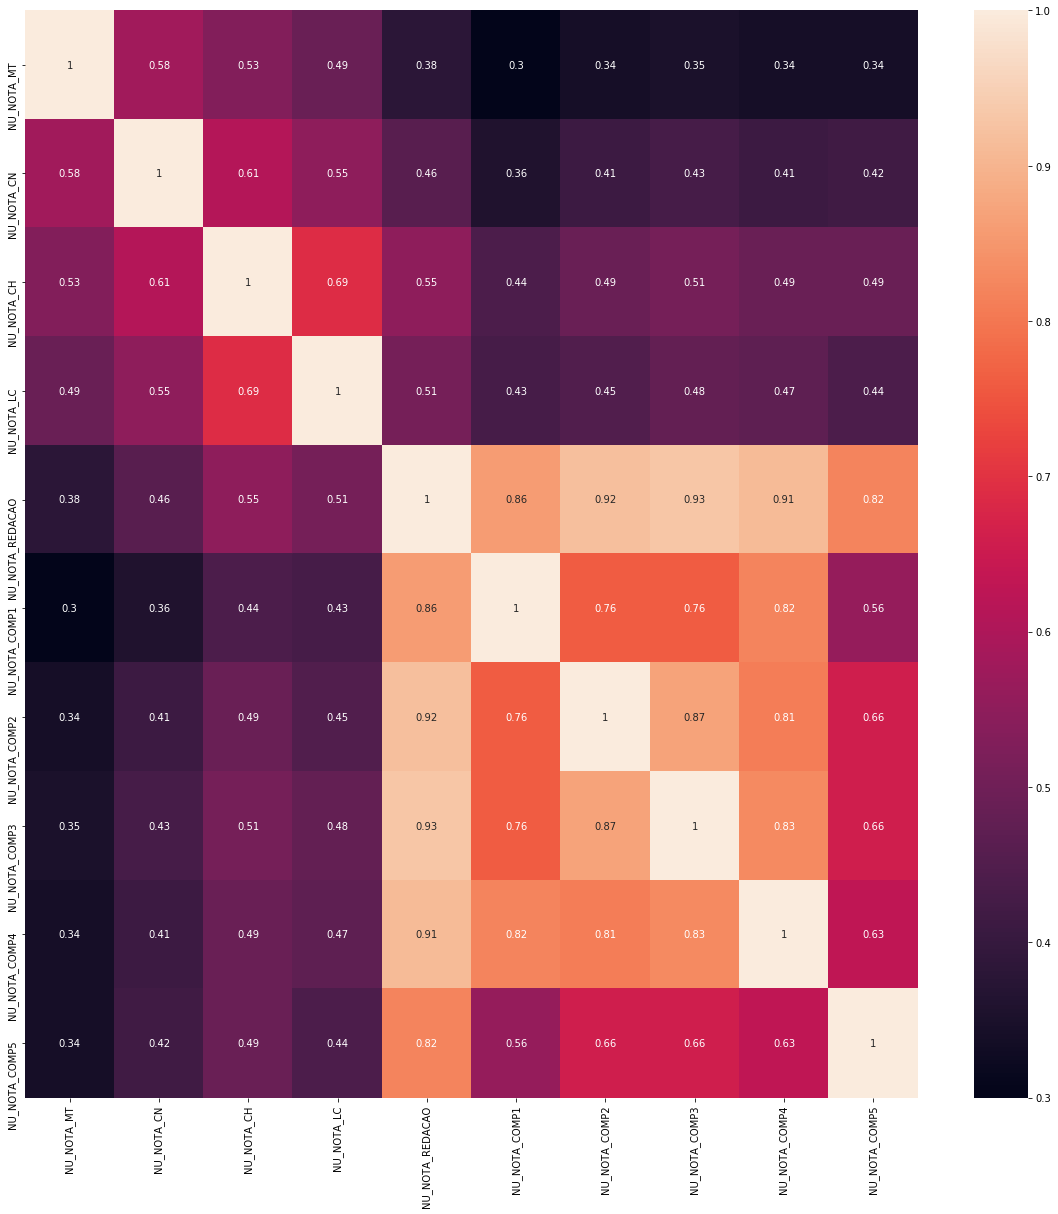

In [13]:
#Analisando a correlacao entre as variaveis númericas
plt.figure(figsize = (20,20))
sns.heatmap(df_train.corr().round(2), annot= True)

### Regressão 

In [14]:
Regr = LinearRegression()

In [15]:
Regr.fit(df_train[C_testR],df_train['NU_NOTA_MT'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
predicted = Regr.predict(df_test)

predicted[:5]

array([436.39082571, 436.98848196, 592.82051321, 544.08613821,
       466.25801321])

#### Validação da regressao 

#### Salvando arquivo 

In [22]:
df_resposta = pd.DataFrame()
df_resposta['NU_INSCRICAO'] = N_inscricao

In [23]:
df_resposta['NU_NOTA_MT'] = np.around(predicted,2)

In [24]:
df_resposta.to_csv('answer.csv', index=False, header=True)